In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# Implementing Linear Regression From Scratch

## Theory



### Linear Regression 

- Linear regression is a widely used statistical technique for predicting a continuous outcome variable based on one or more predictor variables.




#### Understanding Linear Regression

Linear regression aims to establish a linear relationship between the input variables (features) and the output variable (target). The goal is to find the best-fitting line that minimizes the difference between predicted and actual values. Mathematically, this line can be represented as:

$$ y = wx+b $$

Where:

- $y$ represents the dependent variable (output)
- $w$ signifies the weight or parameter vector of the approximation function (i.e slope in a simple linear equation)
- $x$ is the input or independent variable
- $b$ denotes the bias of the approximation function(y-intercept in a simple approximation) and is also known as the error term.

$b$ and $w$ are parameters which we can adjust.

Linear regression could be:
-  __```simple```__ with only one independent ```x``` variable predicting a single dependent variable ```y```
- __```multiple```__ with more than one independent ```x``` variable predicting a single dependent variable ```y```

#### Simple Linear Regression

<img src="SLR.PNG" width="600" >


- Simple Linear Regression specifically refers to the case where there is only one independent variable ```x``` predicting a single dependent variable ```y```. The relationship between ```x``` and ```y``` is modeled as a straight line, represented by the equation:

$$ y = wx+b $$


The linear regression model aims to find the optimal values for w and b that minimize the difference between the predicted values and the actual observations. The weight (w) governs the influence of the input variable, determining the slope of the fitted line, while the bias (b) allows for an adjustment of the line’s position on the y-axis. The interplay of these components forms the basis for constructing an effective linear regression model that accurately captures the underlying relationships within the data.

Some of the practical uses of using Simple Linear Regression include

- Predicting a students’ exam score based on the number of hours they spent studying.
- Predicting temperature based on the number of hours of sunlight in a day.

#### Multiple Linear Regression

- Multiple Linear Regression is an extension of Simple Linear Regression, designed to model the relationship between a dependent variable ```y``` and multiple independent variables $X( x_{1},x_{2},…,xn )$. In Multiple Linear Regression, the relationship is expressed through a linear equation that includes multiple predictors, allowing for a more realistic representation of complex real-world scenarios. The formula features multiple slopes (one for each variable $x_{i}$) and a shared y-intercept, that considers the impact of multiple variables on the relationship’s slope. The equation for multiple linear regression is:

$$ y = w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}+b $$

Multiple linear regression is used when several independent variables collectively influence a single dependent variable which allows for the incorporation of multiple factors that influence the dependent variable, providing a more realistic representation of complex relationships.

Some practical use cases of using Multiple Linear Regression include

- Predicting the price of a house based on multiple features such as square footage, number of bedrooms, and location.
- Predicting sales based on factors like advertising spending, store size, and promotional events.




### Gradient Descent 

- One way to implement a Simple Linear Regression is with Gradient Descent.

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function by adjusting parameters in the direction of the steepest descent of the gradient, aiming to minimize the cost or error associated with a model’s predictions. Gradient descent is used in fields such as web analytics, online advertising, and large-scale machine-learning applications.

Gradient Descent is well-suited for dynamic and large-scale environments, such as online retail sales prediction, social media engagement prediction, and weather forecasting, where continuous model adjustments are essential for accuracy. Additionally, Gradient descent is also adaptable for nonlinear regression in complex relationships, finding utility in fields such as biology, chemistry, and physics.

<img src="GD.PNG" width="600" >



Linear regression using the gradient descent algorithm involves minimizing the cost function by iteratively updating the model parameters weight (\(w\)) and bias (\(b\)). The cost function (also known as the loss function) measures the difference between predicted and actual values. Here’s a step-by-step explanation using mathematical expressions:

#### Linear Regression Model:
The linear regression model is represented as:

$$\hat{y_i} = wx_i + b \tag{1}$$


where:

- ```ŷ``` is the predicted value for the \(i\)-th data point.
- ```w``` is the weight (slope coefficient).
- ```b``` is the bias (y-intercept).
- $x_{i}$ is the independent variable (input feature for the \(i\)-th data point).

#### Cost Function:
The cost function measures how well your linear regression model is performing. It quantifies the error between the predicted values and the actual values from your dataset. In linear regression, the most common cost function is the **Mean Squared Error (MSE)**:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

where:
- \( m \) is the number of training examples,
- \( h_\theta(x^{(i)}) \) is the prediction from your model, and
- \( y^{(i)} \) is the actual value.



#### Gradient Descent Update Rule: 

- The gradient descent algorithm minimizes the cost function by iteratively updating the parameters using the following update rule.


1. **For \(w\)**:

   $$
   w := w - \alpha \left( \frac{1}{n} \sum_{i=1}^{n} \left( wx_i + b - y_i \right) x_i \right)
   $$

2. **For \(b\)**:

   $$
   b := b - \alpha \left( \frac{1}{n} \sum_{i=1}^{n} \left( wx_i + b - y_i \right) \right)
   $$

Where:
- $\alpha$ is the learning rate that controls the step size.
- \( w \) and \( b \) are updated iteratively until the cost function converges.

The learning rate(α) is a hyperparameter in gradient descent that determines the step size taken during each iteration to update model parameters and influence the convergence speed and stability of the algorithm. Choosing an appropriate learning rate is crucial. If the learning rate is too small, the algorithm may take a long time to converge, or it may get stuck in local minima. On the other hand, if the learning rate is too large, the algorithm may overshoot the minimum, potentially failing to converge or oscillating around the optimal values. The learning rate is often set empirically through experimentation and hyperparameter tuning, balancing the trade-off between convergence speed and stability. Common choices for learning rates include 0.1, 0.01, and 0.001, but the optimal value can vary depending on the specific problem and dataset.

#### Iterative Process:
Repeat until convergence:

* Update ```w``` and ```b```​ using the gradient descent update rule.
* Calculate the cost function ```J(w,b​)```.
* Check for convergence or a predefined number of iterations.

#### How Gradient Descent and Cots Function Work Together
- The __cost function__ is the error you're trying to minimize.
- __Gradient descent__ is the method used to minimize that cost function by iteratively adjusting the model parameters.

## Python Implementation

1. Randomly initialize the weights(w) and biases(b). The weights and biases will be updated during each iteration of the gradient descent to minimize the loss.



In [3]:
# Initialize weights and bias
def initialize(dim):
    w = np.random.rand(dim)
    b = np.random.rand()
    return w, b

2. Compute the cost i.e the difference between the predicted and observed value of y

In [4]:
# Compute the cost function
def compute_cost(X, Y, y_hat):
    m = len(Y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_hat - Y))
    return cost

3. Predict the value of y using weights and biases for the input X

In [5]:
# Predict output (y) based on input (X), weights (w), and bias (b)
def predict_y(X, w, b):
    if len(w) == 1:
        return X * w[0] + b
    return np.dot(X, w) + b

4. Update the parameters (w,b)

In [6]:

# Update weights and bias using gradient descent
def update_parameters(X, Y, y_hat, b, w, learning_rate):
    m = len(Y)
    dw = (1/m) * np.dot((y_hat - Y), X)
    db = (1/m) * np.sum(y_hat - Y)
    
    w -= learning_rate * dw
    b -= learning_rate * db
    
    return b, w

5. Let’s implement the gradient descent function by iteratively updating the weights and biases to minimize the cost function. We’ll set a maximum threshold for the number of iterations or terminate the iteration when the specified early stopping criterion is met. In our case, the stopping criterion is defined by the difference between the previous and current values of the cost function falling below a specified threshold. Throughout the iterations, we’ll update the cost at each step, allowing us to visualize the trend and assess any issues related to vanishing or exploding gradients.

In [7]:
# Gradient descent function to optimize weights and bias
def run_gradient_descent(X, Y, alpha, max_iterations, stopping_threshold=1e-6):
    dims = 1 if len(X.shape) == 1 else X.shape[1]
    w, b = initialize(dims)
    previous_cost = None
    cost_history = np.zeros(max_iterations)

    for itr in range(max_iterations):
        y_hat = predict_y(X, w, b)
        cost = compute_cost(X, Y, y_hat)

        # Early stopping criterion
        if previous_cost and abs(previous_cost - cost) <= stopping_threshold:
            break

        cost_history[itr] = cost
        previous_cost = cost

        # Update weights and bias
        b, w = update_parameters(X, Y, y_hat, b, w, alpha)

    return b, w, cost_history

6. Now let’s put it all together and run the algorithm on a toy dataset as shown below.

In [8]:
# Example usage
X = np.array([32.5, 53.4, 61.5, 47.5, 59.8, 55.1, 52.2, 39.3, 48.1, 52.5, 
              45.4, 54.3, 44.1, 58.1, 56.7, 48.9, 44.6, 60.3, 45.6, 38.8])
Y = np.array([31.7, 68.7, 62.5, 71.5, 87.2, 78.2, 79.6, 59.1, 75.3, 71.3,
              55.1, 82.4, 62.0, 75.3, 81.4, 60.7, 82.8, 97.3, 48.8, 56.8])

7. Define the hyper-parameters like learning rate and maximum number of iterations and call the gradient descent function.

In [9]:
learning_rate = 0.0001
iterations = 1000

b, w, cost_history = run_gradient_descent(X, Y, learning_rate, iterations)
print(f"Optimized b: {b}, w: {w}")

Optimized b: 0.5857036843948914, w: [1.37875447]


8. Plot the cost function to visualize the convergence

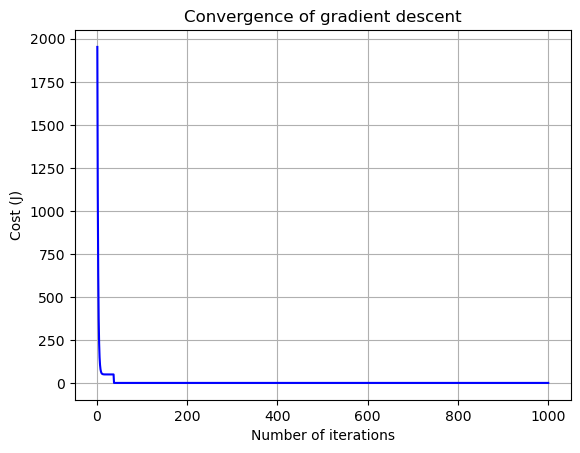

In [10]:

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.grid()
plt.show()

9. Plot the data points and the regression line

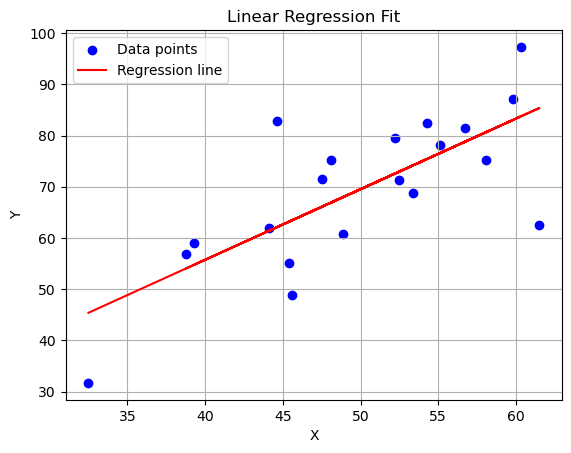

In [11]:
# Plot the data points
plt.scatter(X, Y, color='blue', label='Data points')

# Generate predictions using the optimized weights and bias
y_pred = predict_y(X, w, b)

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

## Implementation of Linear Regression Using Scikit-Learn (OLS)

1. Preparing the Data (X and Y):

* ```X``` is your input feature(s), and ```Y``` is the target value (output) you're trying to predict.
* In scikit-learn's ```LinearRegression``` model, the ```.fit()``` method expects the input ```X``` to be a 2D array of shape ```(n_samples, n_features)```, where ```n_samples``` is the number of observations and ```n_features``` is the number of input variables ```(features)```. When you provide a 1D array like ```X = np.array([...])```, it is interpreted as a single sample instead of multiple samples. Therefore, you need to reshape X using ```.reshape(-1, 1)``` to convert it to a 2D array with a single feature ```(column)```, making it of shape ```(n_samples, 1)```.

In [12]:
# Sample data
X = np.array([32.5, 53.4, 61.5, 47.5, 59.8, 55.1, 52.2, 39.3, 48.1, 52.5, 
              45.4, 54.3, 44.1, 58.1, 56.7, 48.9, 44.6, 60.3, 45.6, 38.8]).reshape(-1, 1)
Y = np.array([31.7, 68.7, 62.5, 71.5, 87.2, 78.2, 79.6, 59.1, 75.3, 71.3,
              55.1, 82.4, 62.0, 75.3, 81.4, 60.7, 82.8, 97.3, 48.8, 56.8])

2. Initializing the Linear Regression Model:

```model = LinearRegression()``` initializes the linear regression model object.
No manual initialization of weights ```(b)``` or bias ```(w)``` is needed. Scikit-learn handles this internally.

In [13]:
# Initialize the model
model = LinearRegression()


3. Fitting the Model:

* ```model.fit(X, Y)``` finds the best-fitting line by minimizing the cost function (mean squared error).
* Behind the scenes, scikit-learn calculates the optimal weights and bias by solving the normal equations (closed-form solution), rather than using gradient descent. This is faster for linear regression.

Cost function (minimized internally):

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

In [14]:

# Fit the model
model.fit(X, Y)

LinearRegression()

4. Prediction ```(model.predict)```:
* y_pred = model.predict(X) uses the learned weights and bias to predict values of Y based on the input X.
* The model uses the equation $\hat{y} = wx + b $ to make predictions.

In [15]:
# Predict Y based on X
y_pred = model.predict(X)

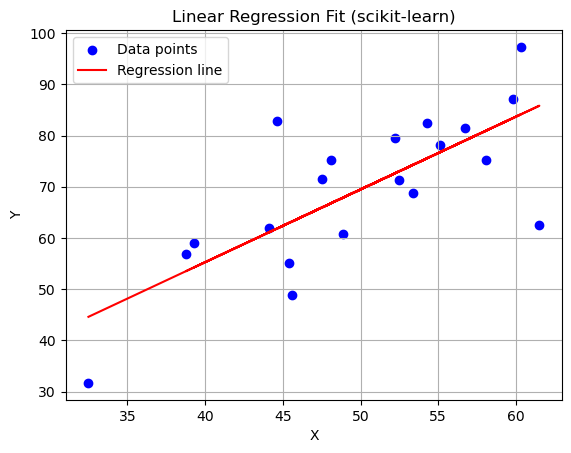

Intercept (w): -1.5863943961138034
Slope (b): 1.4212755461322477


In [16]:
# Plot the data points
plt.scatter(X, Y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit (scikit-learn)')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope (b) and intercept (w)
print(f"Intercept (w): {model.intercept_}")
print(f"Slope (b): {model.coef_[0]}")

## Implementation of Linear Regression Using Scikit-Learn (Gradient Descent)

1. Initialize ``````SGDRegressor``````:

* ``````SGDRegressor`````` is the linear regression model with gradient descent optimization.
* ```max_iter=1000```: The model will iterate up to 1000 times to optimize the weights.
* ```tol=1e-3```: Training will stop when the improvement between iterations is less than 0.001.
* ```learning_rate='constant'```: The learning rate is constant (step size remains the same).
* ```eta0=0.0001```: This is the step size or learning rate for updating the model's weights.


In [17]:
# Initialize the ```SGDRegressor``` model
sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.0001)

2. Fit the Model:

* ```fit(X, Y)```: This trains the model using the input data X and target values Y.
* The model adjusts the weights (slope ```w```) and bias (intercept ```b```) using gradient descent to minimize the error between predictions and actual target values.

In [18]:
# Fit the model
sgd.fit(X, Y)

SGDRegressor(eta0=0.0001, learning_rate='constant')

3. Make Predictions:

* ```predict(X)```: Once the model is trained, it predicts the output ```y_pred``` for the input values X using the optimized weights (```w```) and bias (```b```).

In [19]:
# Predict Y based on X
y_pred = sgd.predict(X)

4. Plot

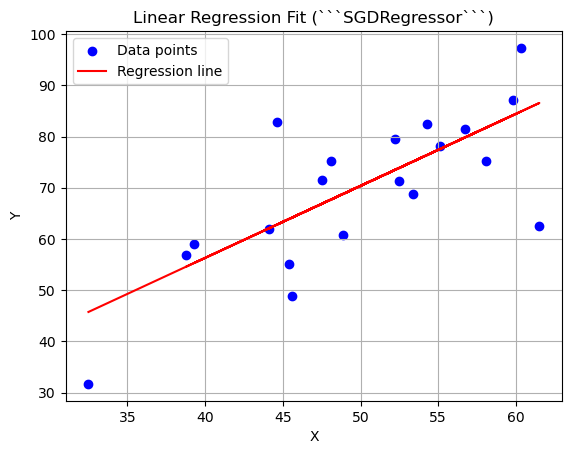

Intercept (b): 0.02601031273276183
Slope (w): 1.4069056085758163


In [20]:
# Plot the data points
plt.scatter(X, Y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit (```SGDRegressor```)')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope (w1) and intercept (b)
print(f"Intercept (b): {sgd.intercept_[0]}")
print(f"Slope (w): {sgd.coef_[0]}")

## Gradient Descent & OLS in scikit-learn:

1. Linear Regression (Closed-Form Solution):

* Method: This uses the normal equation to solve for the best-fit line analytically by minimizing the Mean Squared Error ```(MSE)```.
* Parameters: It directly calculates the slope ```(w)``` and intercept ```(b)``` without the need for iterative updates.
* Advantages: Efficient for small datasets and guarantees a global optimum because it solves the equation exactly.
* Disadvantages: For large datasets, it can be computationally expensive as matrix inversions are involved.

2. ```SGDRegressor``` (Gradient Descent):

* Method: This model uses __Stochastic Gradient Descent (SGD)__ to iteratively adjust the weights ```(w)``` and bias ```(b)``` to minimize the cost function ```(MSE)```.
* Parameters: It uses a learning rate and performs updates based on each data point or a batch of data.
* Advantages: Suitable for large datasets where the normal equation would be inefficient, and it works well in streaming data scenarios.
* Disadvantages: Requires careful tuning of hyperparameters (learning rate, number of iterations). It may converge to a local minimum or take more time to reach the global minimum.

### Comparison of Results:

1. Linear Regression:

* Intercept ```(b)```: The closed-form solution finds the exact intercept of the line.
* Slope ```(w)```: The slope is calculated directly and represents the optimal gradient for the line of best fit.
* Convergence: As it solves the normal equation, it immediately finds the global optimum without iteration.

2. ```SGDRegressor```:

* Intercept ```(b)```: The intercept is found iteratively and may slightly differ depending on the stopping criteria (iterations, tolerance).
* Slope ```(w)```: The slope is adjusted gradually using gradient descent, which may not be as precise as the closed-form solution but is efficient for large data.
* Convergence: Converges through iterations, and the learning rate controls how fast or slow it gets close to the optimum. Hyperparameter tuning is essential for performance.

### Which is Better?

* For Small Datasets: The closed-form Linear Regression method is typically better. It provides exact solutions efficiently and does not require hyperparameter tuning.
* For Large Datasets: ``````SGDRegressor`````` is more suitable due to its scalability and efficiency. It handles large datasets better and can be trained online or in batches.
* In this case (with a small dataset), Linear Regression using the normal equation would likely be more accurate and efficient. However, for much larger datasets, ```SGDRegressor``` would offer better performance in terms of time and memory efficiency.